# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [41]:
# Set options to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('../data/data.csv')
data = data.drop('description', axis=1)

In [3]:
data.shape

(40292, 79)

In [ ]:
data.head()

,source_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,quantity,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,target
0,0,nr_0,sh_0,1075.0,1525.0,1300.0,445.0,18.550,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5,NaN,595.000000,1045.0,70.0,557424.166,4660632.187,-8.0,-3.285714,-4.785714,-4.641189,589357.813000,19.000000,37.000,-2.336779,-4.783428,10.894952,12.573799,4.656628,14995.000000,26245.0,209995.00000,-4.663221,-7.663221,55,-5,NaN,NaN,NaN,NaN,NaN,-5,-5,-5.000000,-5,-5.000000,NaN,NaN,NaN,-5.0,-5.000000,-2,-5.0,10.435261,117.767592,50.816141,22.734541,42.854948,29.971232,29.971232,29.971232,29.971232,-5.000000,-5.0,-5.0,-2.0,29665
1,0,nr_1,sh_0,730.0,1135.0,932.5,400.0,2.980,False,145.0,31.0,NaN,NaN,364.0,-5.0,-5.0,NaN,NaN,-5.0,NaN,NaN,NaN,-5,NaN,145.000000,355.0,31.0,57334.552,121686.802,-8.0,-3.750000,-4.700000,-3.586440,94303.198000,7.500000,25.000,-3.309836,-4.814697,6.736069,9.362475,2.454720,1795.000000,4315.0,17995.00000,-3.690164,-6.690164,43,-5,NaN,NaN,NaN,NaN,NaN,-5,-5,-5.000000,7,-5.298290,1.0,1.0,-0.2,-5.0,-6.193161,-2,-5.0,-7.061576,25.914818,5.355578,1.284534,8.686946,4.463827,6.961738,5.712783,5.712783,-3.751044,-5.0,-5.0,-2.0,3745
2,0,nr_2,sh_1,1495.0,2245.0,1870.0,745.0,18.556,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5,NaN,48.704182,49.0,43.0,3252.127,5843.860,-8.0,-2.016434,-2.333333,-3.329353,9612.944321,-1.643489,-1.625,-3.865533,-4.568771,3.654636,3.671115,3.317766,854.266907,859.0,961.67527,-3.134467,-6.134467,-5,-2,37.246076,37.246076,37.246076,37.246076,-5.000000,-5,-2,-5.253446,4,-6.528278,NaN,NaN,-0.2,-5.0,-9.838279,145,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,-5.0,-5.0,1090
3,0,nr_3,sh_0,355.0,640.0,497.5,280.0,3.100,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5,NaN,160.000000,160.0,31.0,30794.152,98882.692,-8.0,-2.000000,-4.345455,-4.065632,10007.308000,8.750000,8.750,-2.275821,-4.699588,7.022000,7.022000,2.454720,1975.000000,1975.0,9070.00000,-4.724179,-7.724179,58,-5,NaN,NaN,NaN,NaN,NaN,-5,-2,-5.000000,34,-10.625499,1.0,NaN,NaN,-5.0,-78.131491,-2,-5.0,-5.122854,42.865450,14.561778,-5.017200,17.187386,7.887519,96.690142,37.488393,7.887519,36.861958,-5.0,-5.0,-2.0,4006
4,0,nr_4,sh_1,190.0,205.0,197.5,10.0,-0.770,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5,NaN,219.961948,220.0,175.0,83981.914,266590.069,-8.0,-2.000507,-2.600000,-4.054893,745728.698782,-1.250634,-1.250,-4.209955,-4.786605,7.951957,7.952464,7.283034,13492.716904,13495.0,16867.14613,-2.790045,-5.790045,7,4,1090.784558,2586.778873,1881.187138,1965.997982,608.674402,-5,-5,-5.000000,-2,-6.575761,NaN,NaN,NaN,-5.0,-6.575761,-2,-2.0,27.450350,51.054056,36.637577,34.022951,4.741767,NaN,NaN,NaN,NaN,NaN,-5.0,-5.0,-5.0,2395


In [ ]:
data.describe()

,source_id,feature_3,feature_4,feature_5,feature_6,feature_7,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,quantity,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,target
count,40292.000000,38666.000000,39720.000000,38477.000000,38477.000000,39230.000000,13336.000000,9256.000000,2151.000000,0.0,11199.000000,694.000000,451.000000,53.000000,0.0,695.000000,7.000000,14.000000,9.0,40292.000000,2.151000e+03,40292.000000,40292.000000,40292.000000,4.029200e+04,4.029200e+04,40292.000000,40292.000000,40292.000000,40292.000000,4.029200e+04,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,4.029200e+04,4.029200e+04,4.029200e+04,40287.000000,40283.000000,40292.000000,40292.000000,1.242500e+04,1.242500e+04,1.242500e+04,1.242500e+04,1.242500e+04,40292.000000,40292.000000,40292.000000,40292.000000,40292.000000,19908.000000,18051.000000,22500.000000,40292.000000,40292.000000,4.029200e+04,40292.000000,32111.000000,32111.000000,32111.000000,32111.000000,32111.000000,28955.000000,28955.000000,28955.000000,28955.000000,28955.000000,40292.000000,40292.000000,40292.000000,4.029200e+04
mean,10.170232,855.445125,1201.925121,1042.533656,365.623401,7.330655,382.781097,173.104698,59.095851,NaN,638.232481,-2.448638,-2.493869,-4.864151,NaN,-3.560388,-352.142857,-120.714286,-95.0,-4.997841,5.641229e+06,307.027092,733.808858,71.687210,4.045992e+05,3.897903e+06,-7.921743,-3.226510,-4.196835,-3.661284,2.655484e+06,14.438455,41.715540,-3.314491,-4.753303,7.089977,9.424775,3.755063,9.864298e+03,2.184790e+04,1.950222e+05,-3.685346,-6.655808,59.501861,0.712002,1.113848e+03,1.753021e+04,4.452815e+03,1.953498e+03,6.040892e+03,-4.327733,-3.306488,-4.893565,7.984687,-5.019448,0.910790,0.661293,-18.976428,-4.999939,-4.795914,2.689784e+03,-4.155813,-222.934855,911.751235,176.204585,107.804535,301.822185,30.617427,183.080613,70.867095,57.138862,45.085814,-4.935893,-3.881589,-4.198327,1.830040e+04
std,5.438790,721.870820,940.557718,820.674177,333.917419,8.397670,645.670284,325.887396,61.810920,NaN,1029.580930,5.303988,7.081593,0.837371,NaN,4.834575,256.821227,253.155905,270.0,0.080456,1.638714e+07,507.286603,1128.272499,76.001665,1.683687e+06,7.367359e+07,0.833447,0.956208,0.743430,2.145658,5.518693e+07,41.820389,92.213483,0.767369,0.085684,3.115541,3.465339,2.418890,5.335356e+04,8.017493e+04,9.193184e+05,0.767277,0.990341,143.206811,19.941936,2.020664e+04,1.264229e+06,2.122586e+05,2.637545e+04,4.710923e+05,4.526848,3.705015,1.549120,25.779264,3.317653,0.760835,0.959373,390.898755,0.000526,477.405138,4.827442e+05,1.349057,5136.758739,11001.603762,2945.783008,2949.422032,2869.875816,121.916684,921.826801,245.154788,231.317871,307.436977,0.433839,1.450669,1.327548,5.493773e+04
min,0.000000,7.540000,31.000000,31.000000,-5.000000,-2.270000,4.000000,-2.000000,-2.000000,NaN,-2.000000,-5.000000,-5.000000,-5.000000,NaN,-5.000000,-815.000000,-275.000000,-275.0,-5.000000,2.875000e+03,-1.550000,-0.500000,-4.040000,2.209600e+01,-2.348000e+00,-8.000000,-4.981328,-4.997429,-4.990411,-5.000780e+00,-2.000000,-2.000000,-4.994655,-4.995833,-4.580712,-3.783603,-8.418294,-1.061428e+00,-9.500001e-01,1.700785e+00,-5.000000,-8.000000,-5.000000,-5.000000,1.020116e+00,2.147549e+00,2.147549e+00,1.328734e+00,-5.000000e+00,-5.000000,-5.000000,-18.920134,-5.000000,-99.289911,-2.000000,-2.000000,-6206.000000,-5.000000,-9

## Duplicates

In [ ]:
# I won't drop the duplicates since I don't know about the data
print("Duplicated rows: ", data.duplicated().sum())
# data.drop_duplicates(inplace=True)

Duplicated rows:  813


## Missing values

In [ ]:
data.apply(lambda x: x.isnull().mean() * 100)

source_id       0.000000
feature_1       0.000000
feature_2       0.000000
feature_3       4.035541
feature_4       1.419637
feature_5       4.504616
feature_6       4.504616
feature_7       2.635759
feature_8       0.000000
feature_9      66.901618
feature_10     77.027698
feature_11     94.661471
feature_12    100.000000
feature_13     72.205401
feature_14     98.277574
feature_15     98.880671
feature_16     99.868460
feature_17    100.000000
feature_18     98.275092
feature_19     99.982627
feature_20     99.965254
feature_21     99.977663
feature_22      0.000000
feature_23     94.661471
feature_24      0.000000
feature_25      0.000000
feature_26      0.000000
feature_27      0.000000
feature_28      0.000000
feature_29      0.000000
feature_30      0.000000
feature_31      0.000000
feature_32      0.000000
feature_33      0.000000
feature_34      0.000000
feature_35      0.000000
feature_36      0.000000
feature_37      0.000000
feature_38      0.000000
feature_39      0.000000


In [ ]:
data.groupby('source_id').apply(lambda x: x.isnull().mean() * 100)

/tmp/ipykernel_326691/2313515179.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  candidates_data.groupby('source_id').apply(lambda x: x.isnull().mean() * 100)


,source_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,quantity,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,target
source_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,2.189142,0.175131,2.364273,2.364273,1.576182,0.0,65.148862,81.698774,100.000000,100.0,66.287215,93.695271,97.285464,99.562172,100.0,93.695271,99.562172,99.387040,99.562172,0.0,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,67.950963,67.950963,67.950963,67.950963,67.950963,0.0,0.0,0.0,0.0,0.0,51.926445,55.954466,30.385289,0.0,0.0,0.0,0.0,27.845884,27.845884,27.845884,27.845884,27.845884,41.506130,41.506130,41.506130,41.506130,41.506130,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.562746,1.406866,1.969612,1.969612,0.506472,0.0,74.957794,81.935847,97.073720,100.0,77.771525,98.480585,98.930782,99.887451,100.0,98.424311,99.943725,99.718627,99.943725,0.0,97.073720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,70.005627,70.005627,70.005627,70.005627,70.005627,0.0,0.0,0.0,0.0,0.0,40.011255,41.249297,35.453011,0.0,0.0,0.0,0.0,17.613956,17.613956,17.613956,17.613956,17.613956,29.487901,29.487901,29.487901,29.487901,29.487901,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.441501,0.0,99.779249,99.779249,99.926416,100.0,99.852833,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,0.0,99.926416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,67.549669,67.549669,67.549669,67.549669,67.549669,0.0,0.0,0.0,0.0,0.0,41.795438,49.153790,8.609272,0.0,0.0,0.0,0.0,8.314937,8.314937,8.314937,8.314937,8.314937,11.479029,11.479029,11.479029,11.479029,11.479029,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.523560,0.418848,0.837696,0.837696,0.942408,0.0,90.575916,94.136126,99.371728,100.0,91.204188,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,0.0,99.371728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,64.293194,64.293194,64.293194,64.293194,64.293194,0.0,0.0,0.0,0.0,0.0,67.434555,80.732984,46.596859,0.0,0.0,0.0,0.0,20.104712,20.104712,20.104712,20.104712,20.104712,30.680628,30.680628,30.680628,30.680628,30.680628,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.885014,0.094251,1.932139,1.932139,2.356268,0.0,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,0.0,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047125,0.000000,0.0,0.0,68.991517,68.991517,68.991517,68.991517,68.991517,0.0,0.0,0.0,0.0,0.0,18.661640,19.604147,17.766258,0.0,0.0,0.0,0.0,22.196041,22.196041,22.196041,22.196041,22.196041,32.846371,32.846371,32.846371,32.846371,32.846371,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.316122,0.000000,0.316122,0.316122,2.528978,0.0,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,0.0,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,53.108535,53.108535,53.108535,53.

In [ ]:
# Drop columns with more than 99% missing values
data = data.dropna(thresh=data.shape[0] * 0.01, axis=1)

In [ ]:
data.shape

(40292, 73)

## Correlation between columns

In [ ]:
df_numerico = data.select_dtypes(include=[np.number])
correlacion = df_numerico.corr()
correlacion_absoluta = correlacion.abs()
triangulo_superior = correlacion_absoluta.where(np.triu(np.ones(correlacion_absoluta.shape), k=1).astype(np.bool))
columns_to_drop = [column for column in triangulo_superior.columns if any(triangulo_superior[column] > 0.95)]
columns_to_drop

['feature_4',
 'feature_5',
 'feature_25',
 'feature_43',
 'feature_44',
 'feature_49',
 'feature_50',
 'feature_52',
 'feature_74']

In [ ]:
data = data.drop(columns=columns_to_drop)

In [ ]:
data.shape

(40292, 64)

## Variability

In [ ]:
for col in data.columns:
    value_counts = data[col].value_counts(normalize=True)
    
    if (value_counts > 0.99).any():
        print(f"Columna: {col}")
        print(value_counts)
        print("\n")


Columna: feature_8
feature_8
False    0.993845
True     0.006155
Name: proportion, dtype: float64


Columna: feature_22
feature_22
-5    0.99928
-2    0.00072
Name: proportion, dtype: float64




In [ ]:
data = data.drop(['feature_8', 'feature_22'], axis=1)

In [ ]:
data.shape

(40292, 62)

## Data types

In [ ]:
data['source_id'] = data['source_id'].astype('category')
data['feature_1'] = data['feature_1'].astype('category')
data['feature_2'] = data['feature_2'].astype('category')

In [ ]:
# Numeric columns that maybe could be categorical
data.select_dtypes(include=['int64', 'float64']).nunique().sort_values()

feature_75        2
feature_76        2
feature_77        2
feature_64        2
feature_58        3
feature_59        3
feature_54       17
feature_18       22
feature_15       26
feature_53       36
feature_14       69
feature_6        74
feature_47       75
feature_56       86
feature_3       102
feature_7       111
feature_60      169
feature_11      184
feature_46      386
feature_29      387
feature_10      810
feature_23     1361
quantity       1368
feature_9      1571
feature_13     1849
feature_61     2041
target         3179
feature_55     3552
feature_26     4114
feature_40     4114
feature_24     7038
feature_38     7038
feature_39     7342
feature_48     9428
feature_51     9924
feature_34    13292
feature_41    13529
feature_30    15831
feature_57    16027
feature_42    16093
feature_31    16749
feature_35    16750
feature_62    18549
feature_70    20581
feature_71    21149
feature_73    22105
feature_69    23933
feature_72    24283
feature_65    26337
feature_66    26598


In [ ]:
columns_to_check = ['feature_75', 'feature_76', 'feature_77', 'feature_64', 'feature_58', 'feature_59', 'feature_54', 'feature_18']

for col in columns_to_check:
    print(f"Valores en la columna {col}:")
    print(data[col].value_counts())
    print("\n")


Valores en la columna feature_75:
feature_75
-5.0    39431
-2.0      861
Name: count, dtype: int64


Valores en la columna feature_76:
feature_76
-5.0    25271
-2.0    15021
Name: count, dtype: int64


Valores en la columna feature_77:
feature_77
-5.0    29525
-2.0    10767
Name: count, dtype: int64


Valores en la columna feature_64:
feature_64
-5.0    28954
-2.0    11338
Name: count, dtype: int64


Valores en la columna feature_58:
feature_58
 1.0    18610
-2.0      945
 4.0      353
Name: count, dtype: int64


Valores en la columna feature_59:
feature_59
 1.0    15975
-2.0     2057
 4.0       19
Name: count, dtype: int64


Valores en la columna feature_54:
feature_54
-5      28276
-2       6156
 1       3509
 4       1192
 7        580
 10       278
 13       142
 16        75
 19        35
 22        16
 25        12
 31         6
 28         5
 34         4
 40         3
 55         2
 295        1
Name: count, dtype: int64


Valores en la columna feature_18:
feature_18
-5.000    

In [ ]:
data['feature_64'] = data['feature_64'].astype('category')
data['feature_75'] = data['feature_75'].astype('category')
data['feature_76'] = data['feature_76'].astype('category')
data['feature_77'] = data['feature_77'].astype('category')
data['feature_58'] = data['feature_64'].astype('category')
data['feature_59'] = data['feature_64'].astype('category')

## Plot numeric columns

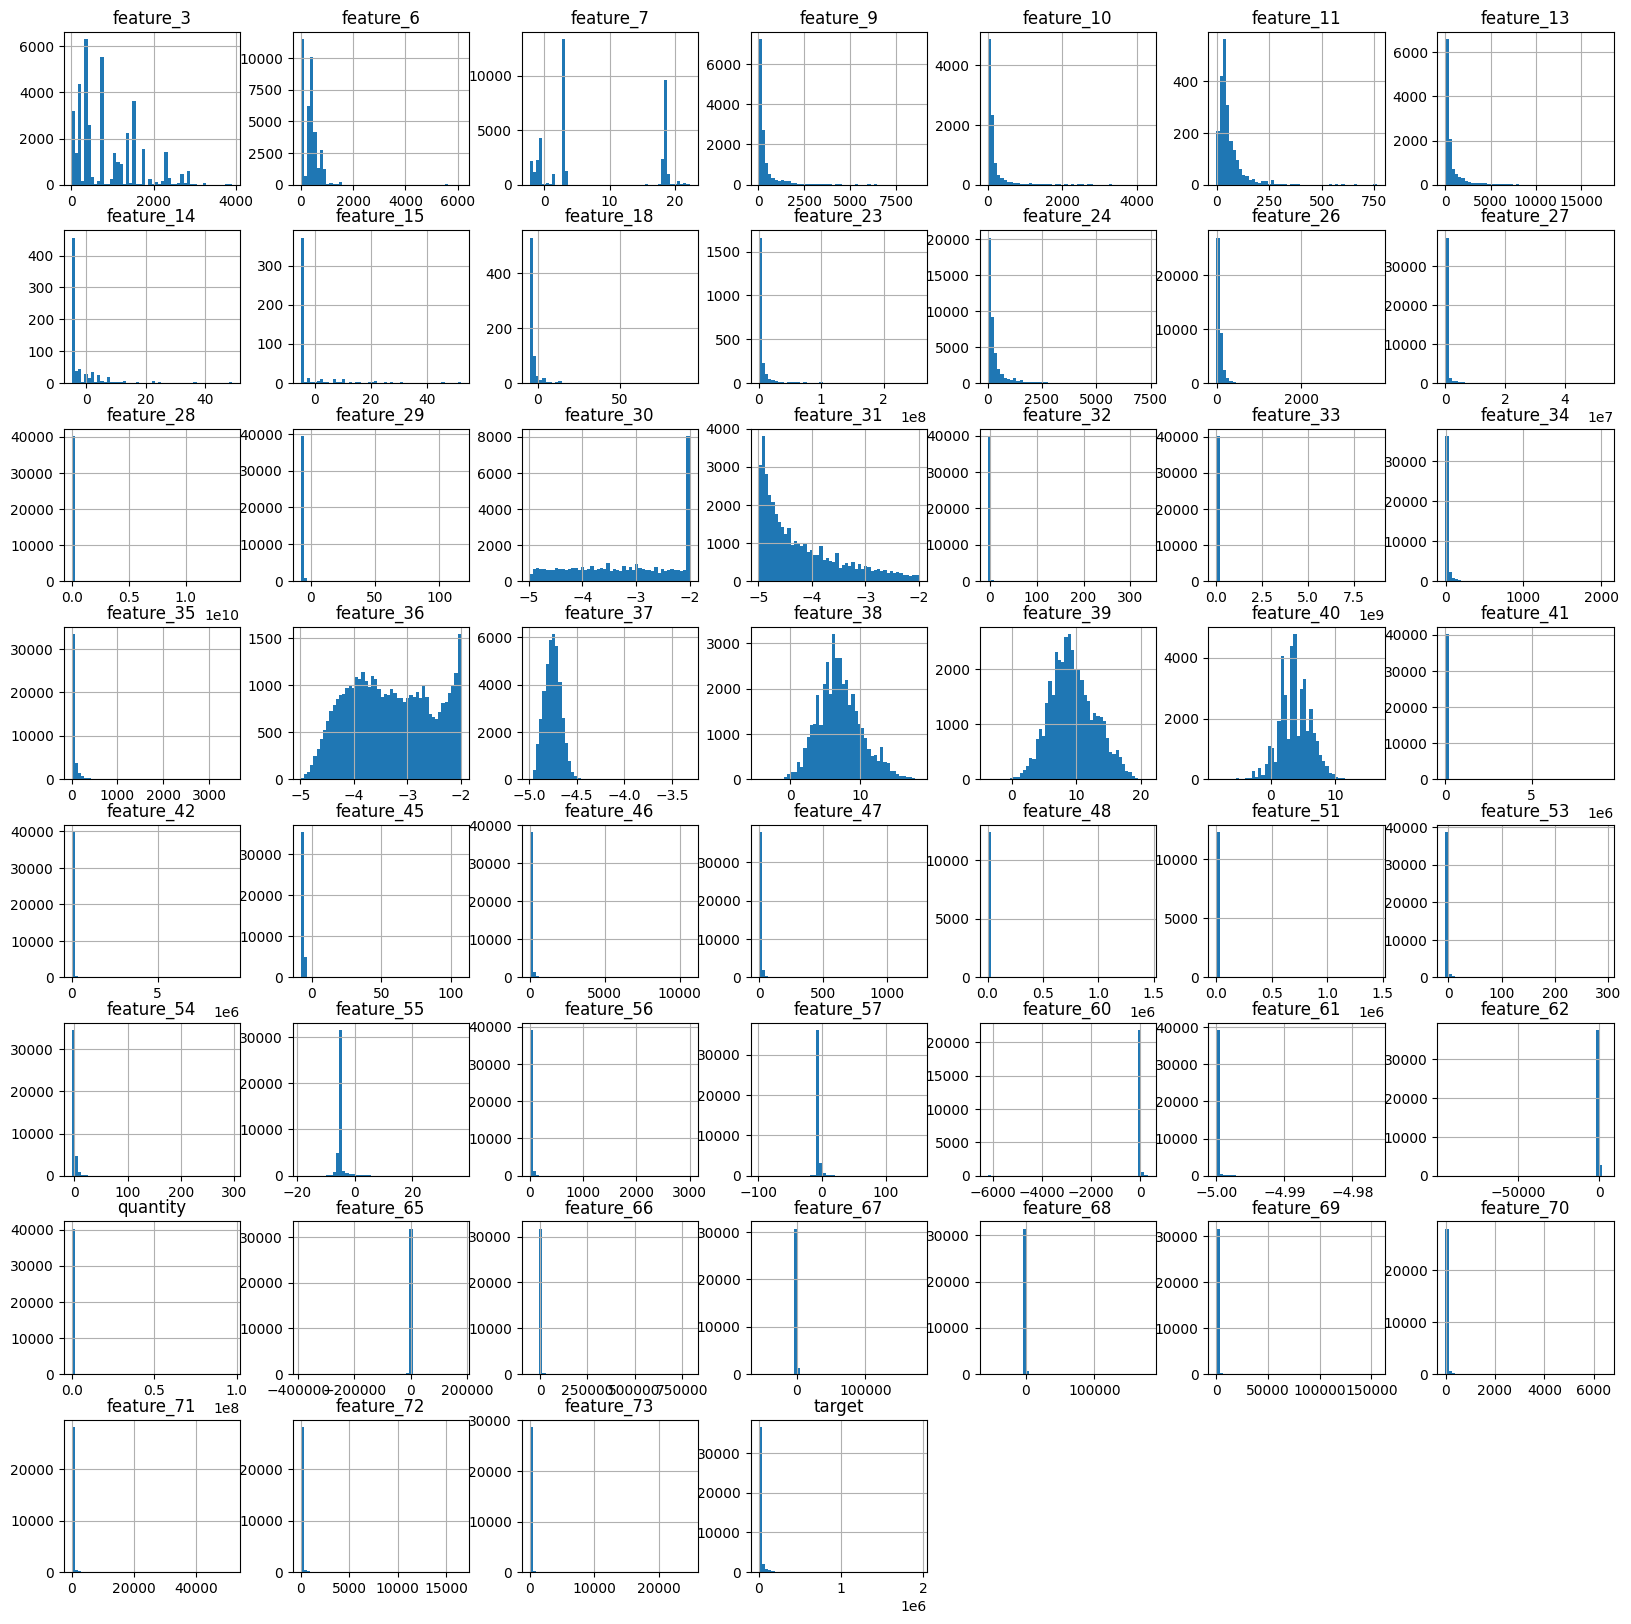

In [ ]:
data.hist(bins=50, figsize=(20,20))
plt.show()